In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_hap=pd.read_csv('happiness.csv')
df_hap=pd.DataFrame(df_hap)
df_hap.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df_hap.columns=['Country',"Region",'Happiness_rank','Happiness_score','Standard_error','Economy',"Family",'Health',"Freedom",'Trust','Generosity','Dystopia_residual']

In [4]:
df_hap.head()

,Country,Region,Happiness_rank,Happiness_score,Standard_error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


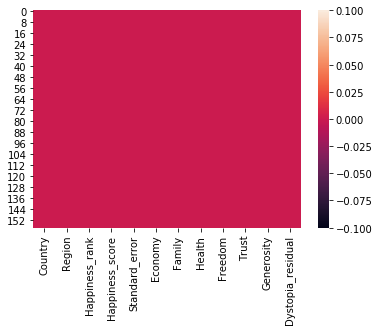

In [5]:
#checking for any missing data
sns.heatmap(df_hap.isnull())

In [6]:
df_hap.isnull().sum()

Country              0
Region               0
Happiness_rank       0
Happiness_score      0
Standard_error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_residual    0
dtype: int64

In [7]:
#We can see there no missing values in the dataset

Number of countries by region: Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64




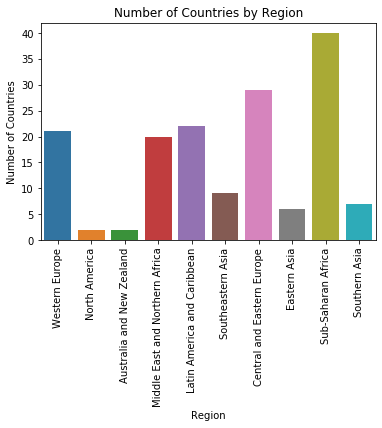

In [8]:
#finding the number of counties in each region
print('Number of countries by region:',df_hap.Region.value_counts())
print('\n')
sns.countplot(df_hap['Region'])
plt.xlabel('Region')
plt.xticks(rotation = 90)
plt.ylabel('Number of Countries')
plt.title('Number of Countries by Region')
plt.show()

In [9]:
df_hap.mean()

Happiness_rank       79.493671
Happiness_score       5.375734
Standard_error        0.047885
Economy               0.846137
Family                0.991046
Health                0.630259
Freedom               0.428615
Trust                 0.143422
Generosity            0.237296
Dystopia_residual     2.098977
dtype: float64

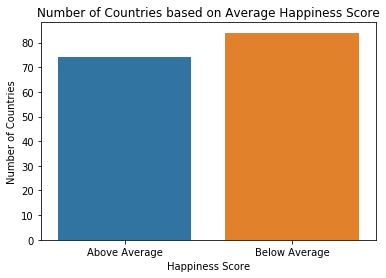

In [10]:
#finding the number of countries below or above average Happiness score
Above_mean_HS =['Above Average' if i >= 5.37 else 'Below Average' for i in df_hap.Happiness_score]
df_mean_HS = pd.DataFrame({'Happiness_score' : Above_mean_HS})
sns.countplot(x = df_mean_HS.Happiness_score)
plt.xlabel('Happiness Score')
plt.ylabel('Number of Countries')
plt.title('Number of Countries based on Average Happiness Score')
plt.show()

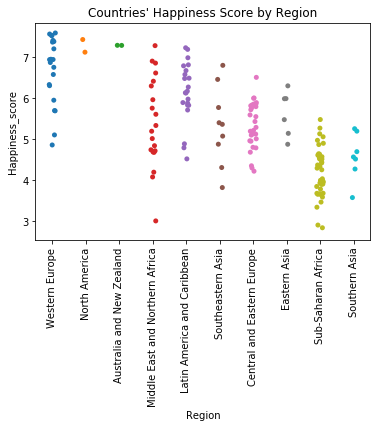

In [11]:
#showing countries' happiness score by region
x = sns.stripplot(x = "Region", y = "Happiness_score", data = df_hap)
plt.xticks(rotation = 90)
plt.title("Countries' Happiness Score by Region")
plt.show()

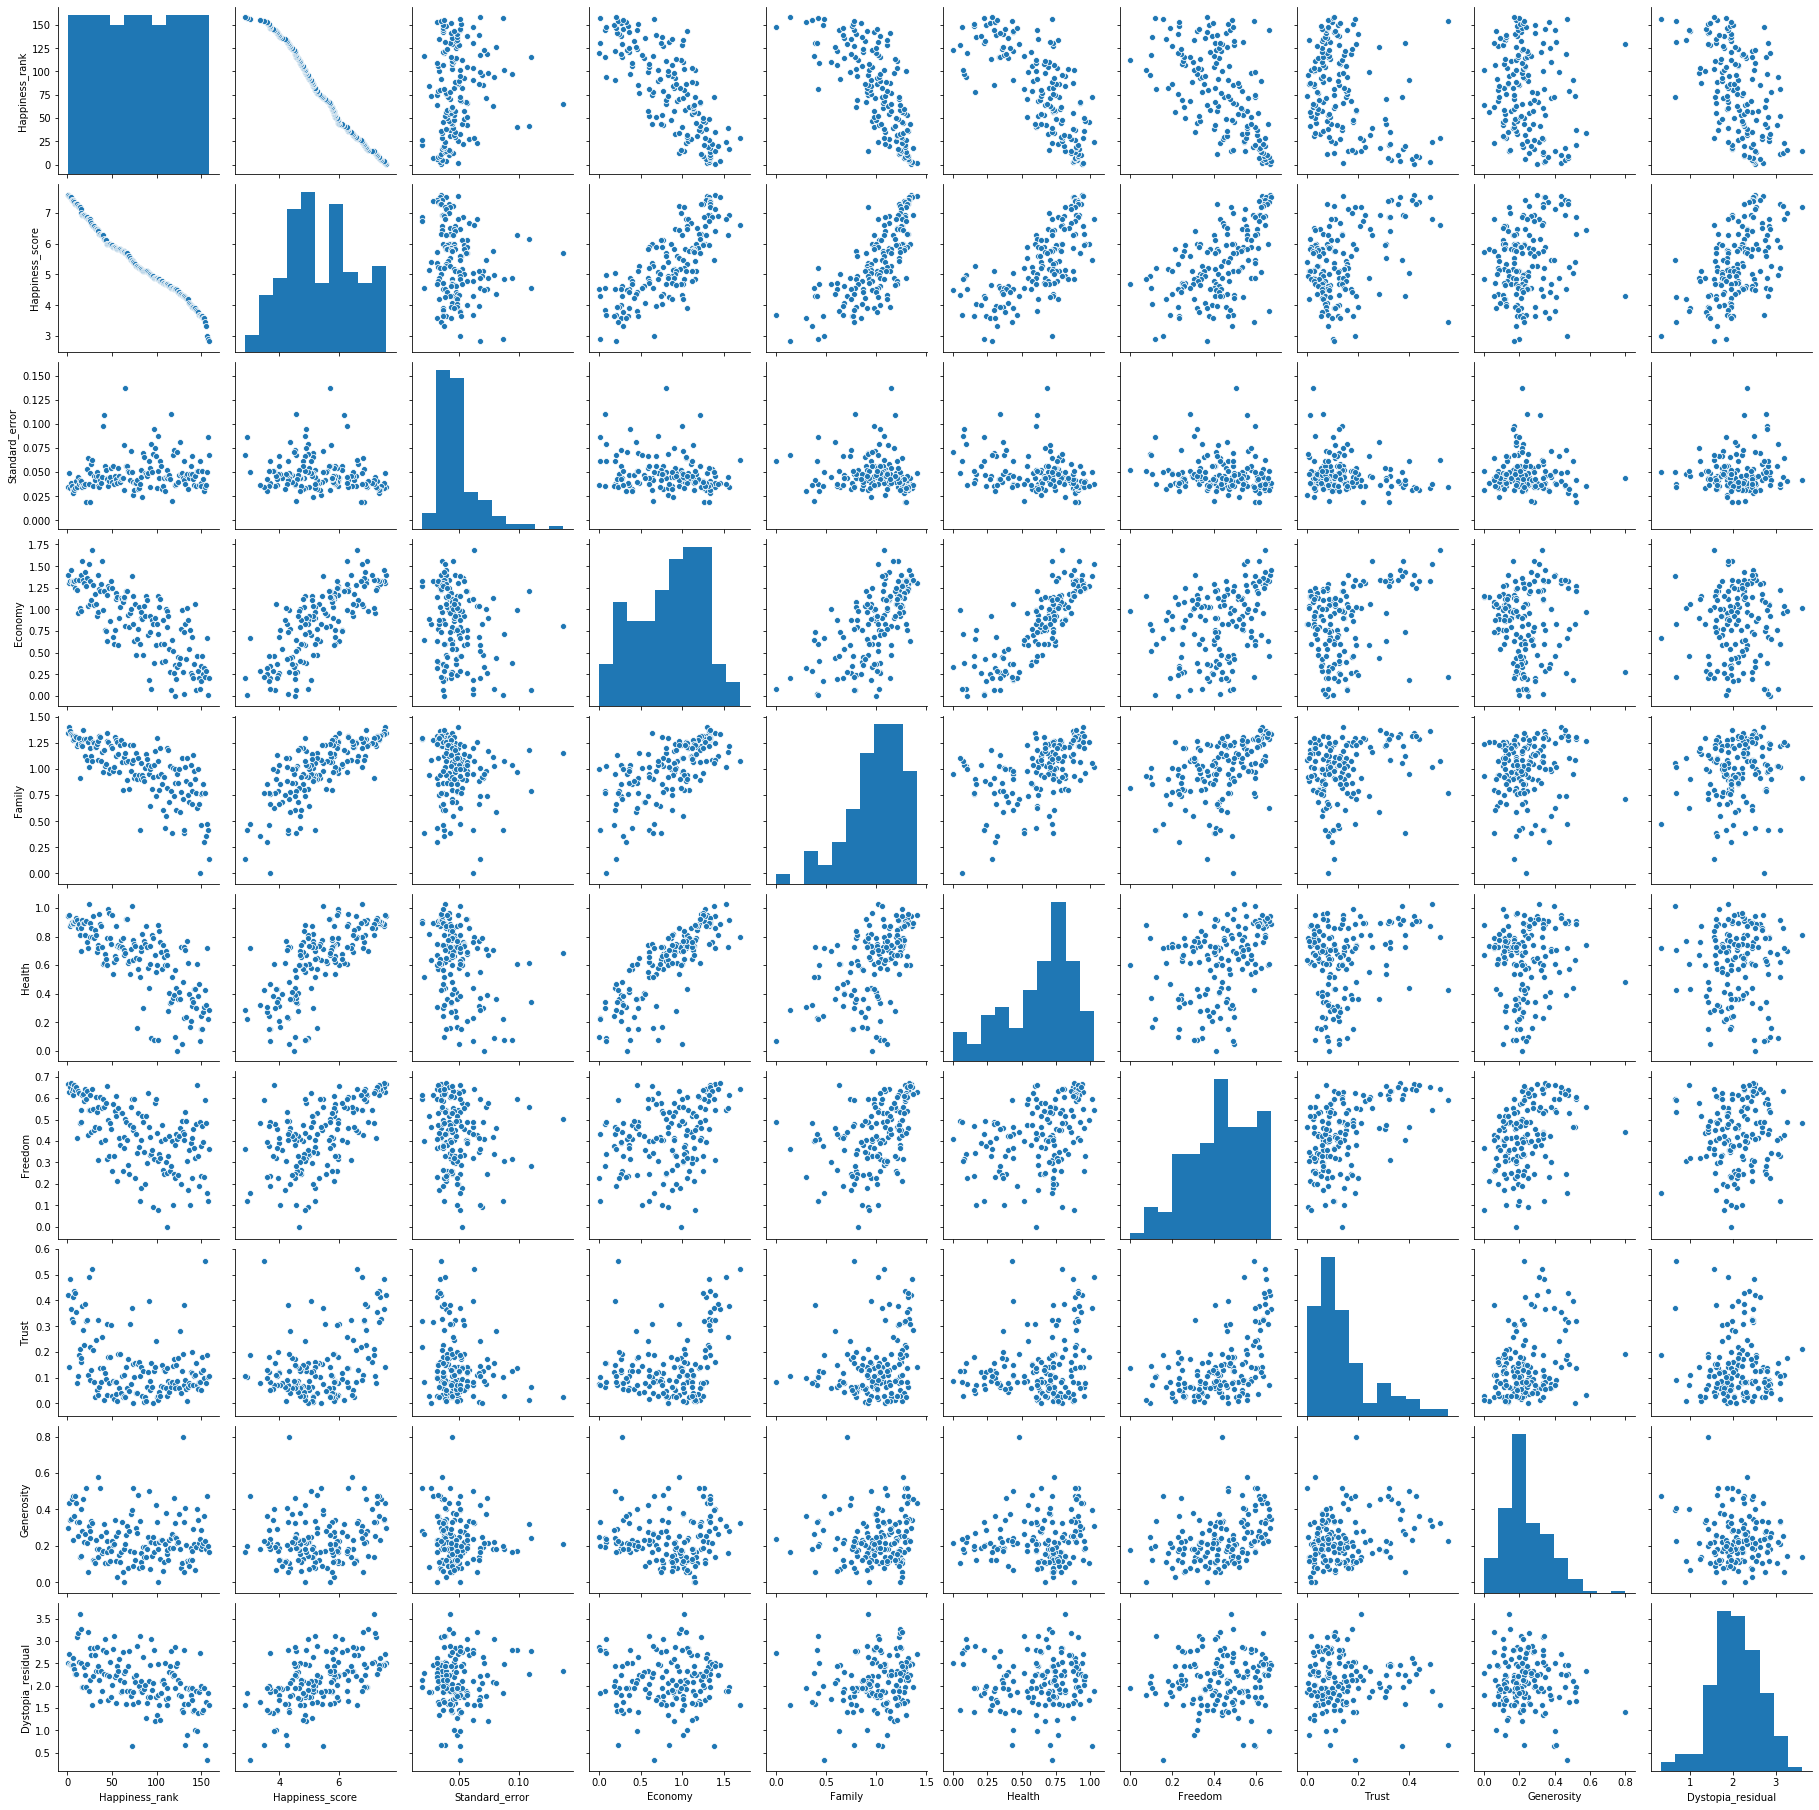

In [12]:
sns.pairplot(df_hap)

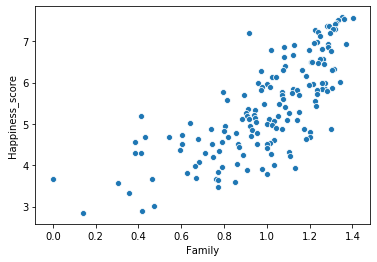

In [13]:
sns.scatterplot(x='Family',y='Happiness_score',data=df_hap)
plt.show()
#shows positive correlation

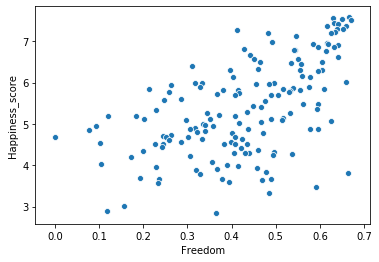

In [14]:
sns.scatterplot(x='Freedom',y='Happiness_score',data=df_hap)
plt.show()


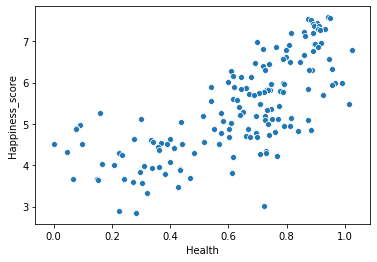

In [15]:
sns.scatterplot(x='Health',y='Happiness_score',data=df_hap)
plt.show()
#shows positive correlation

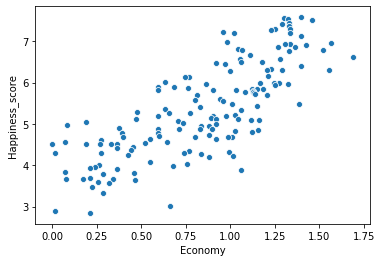

In [16]:
sns.scatterplot(x='Economy',y='Happiness_score',data=df_hap)
plt.show()
#shows positive correlation

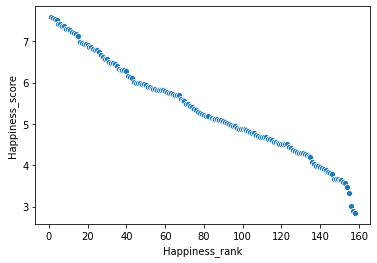

In [17]:
sns.scatterplot(x='Happiness_rank',y='Happiness_score',data=df_hap)
plt.show()
#shows high negative correlation

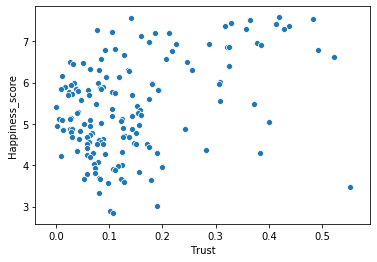

In [18]:
sns.scatterplot(x='Trust',y='Happiness_score',data=df_hap)
plt.show()
#shows low positive correlation

In [19]:
#finding the Correlation
df_hap.corr()

,Happiness_rank,Happiness_score,Standard_error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_residual
Happiness_rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness_score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard_error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia_residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


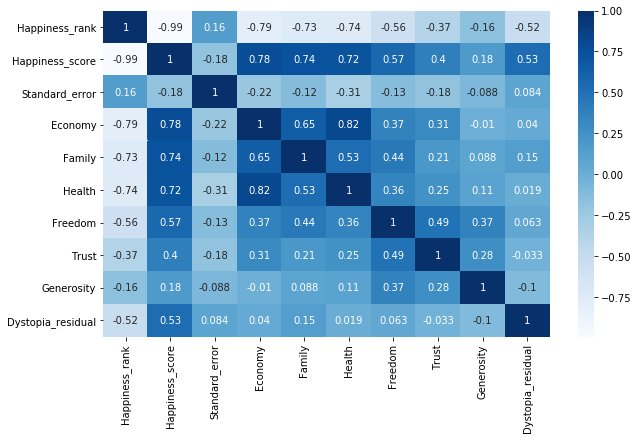

In [20]:
#showing the correlation using a heatmap from seaborn library
plt.figure(figsize=(10,6))
sns.heatmap(df_hap.corr(),cmap="Blues",annot=True)

In [21]:
#Happiness score is highly positively correlated with Economy,Family,Health,Freedom.
#Economy has high positive correlation with Health and Family
#Darker shades shows high positive correlation

In [22]:
#Cheking the skewness of data
df_hap.skew()
# From below ouput, we can say Family,Health,Trust,Genrosity has high skewness and also Standard_error

Happiness_rank       0.000418
Happiness_score      0.097769
Standard_error       1.983439
Economy             -0.317575
Family              -1.006893
Health              -0.705328
Freedom             -0.413462
Trust                1.385463
Generosity           1.001961
Dystopia_residual   -0.238911
dtype: float64

In [23]:
#Since Happiness_rank has high negative correlation with Happiness_score and  
#Standard_error have very low correlation with happiness_score
#Country and Region does not directly affect the Happiness score
#we drop the columns
df_hap.drop(["Happiness_rank","Standard_error",'Country','Region'],inplace=True,axis=1)

In [24]:
df_hap.head()

,Happiness_score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [25]:
#removing skewness using log transform
for col in df_hap.columns:
    if df_hap.skew().loc[col]>0.55:
        df_hap[col]=np.log1p(df_hap[col])

In [26]:
df_hap.skew()
#skewmess is reduced

Happiness_score      0.097769
Economy             -0.317575
Family              -1.006893
Health              -0.705328
Freedom             -0.413462
Trust                1.180922
Generosity           0.650767
Dystopia_residual   -0.238911
dtype: float64

In [27]:
#removing outliers using zscore
from scipy.stats import zscore
zscore=np.abs(zscore(df_hap))
print(zscore)
print(np.where(zscore>3))
df_hap=df_hap[(zscore<3).all(axis=1)]

[[1.93736005 1.36962124 1.32028142 ... 2.24501064 0.52680978 0.75825809]
 [1.91458063 1.13522625 1.51445776 ... 0.03377212 1.56369393 1.09285682]
 [1.88479215 1.19286069 1.36105403 ... 2.69038876 0.87000346 0.71233526]
 ...
 [2.0761992  0.45524543 1.90108634 ... 0.44787992 1.81137234 3.20843049]
 [2.1646885  2.06756644 2.1184666  ... 0.33536184 0.28333124 0.48198451]
 [2.22251319 1.58633379 3.13472485 ... 0.27395059 0.54482432 0.96361241]]
(array([128, 147, 153, 155, 157], dtype=int64), array([6, 2, 5, 7, 2], dtype=int64))


In [28]:
#separating into input and output variables
df_x=df_hap.drop(columns=['Happiness_score'])
y=pd.DataFrame(df_hap['Happiness_score'])

In [29]:
#checking the shape
df_x.shape

(153, 7)

In [30]:
y.shape

(153, 1)

In [31]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [32]:
x.skew()

Economy             -0.364680
Family              -0.822732
Health              -0.743864
Freedom             -0.408952
Trust                1.139661
Generosity           0.407975
Dystopia_residual   -0.032169
dtype: float64

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state,"is",max_r_score)    
    return final_r_state

In [34]:
#Using LinearRegression and checking maxr2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.9999131011703656
r2 score corresponding to 43 is 0.9999326341415143
r2 score corresponding to 44 is 0.999938379208959
r2 score corresponding to 45 is 0.9999362297667975
r2 score corresponding to 46 is 0.9998796226576133
r2 score corresponding to 47 is 0.9999562385403306
r2 score corresponding to 48 is 0.999889566875264
r2 score corresponding to 49 is 0.9998909239075822
r2 score corresponding to 50 is 0.9999400369887156
r2 score corresponding to 51 is 0.9999093835438179
r2 score corresponding to 52 is 0.999928992902276
r2 score corresponding to 53 is 0.9998761670210032
r2 score corresponding to 54 is 0.9999321537151628
r2 score corresponding to 55 is 0.9999268443630288
r2 score corresponding to 56 is 0.999914676994056
r2 score corresponding to 57 is 0.9999355487044868
r2 score corresponding to 58 is 0.9998745503876562
r2 score corresponding to 59 is 0.999921247522447
r2 score corresponding to 60 is 0.9999153498078126
r2 score corresponding to 61 is 0.99

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 9}

In [36]:
#using KNN regression and checking max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=9)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.9369280386016954
r2 score corresponding to 43 is 0.934984467449794
r2 score corresponding to 44 is 0.9231863165205741
r2 score corresponding to 45 is 0.8994671814532714
r2 score corresponding to 46 is 0.8539921797716137
r2 score corresponding to 47 is 0.9041892786661634
r2 score corresponding to 48 is 0.8984116161706985
r2 score corresponding to 49 is 0.9391577503280268
r2 score corresponding to 50 is 0.9334819978082749
r2 score corresponding to 51 is 0.9351540279651196
r2 score corresponding to 52 is 0.9060176654975065
r2 score corresponding to 53 is 0.8674750952956868
r2 score corresponding to 54 is 0.9275296032642188
r2 score corresponding to 55 is 0.887755367821265
r2 score corresponding to 56 is 0.9395946047243489
r2 score corresponding to 57 is 0.9096119493584687
r2 score corresponding to 58 is 0.9236928227072662
r2 score corresponding to 59 is 0.8775829959866178
r2 score corresponding to 60 is 0.9070067956927514
r2 score corresponding to 61 is 0

In [37]:
#checking the mean r2 score of both Linear Regression Model and KNN Regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for KNN Regression:',cross_val_score(knr,x,y,cv=5,scoring='r2').std())
#Based on below output Linear Regression is performing well

Mean r2 score for Linear Regression: 0.9981039683369481
Standard Deviation in r2 score for Linear Regression: 0.0008044008867323756

Mean r2 score for KNN Regression: -4.468300566814739
Standard Deviation in r2 score for KNN Regression: 3.2943608123311874


In [38]:
#Checking lasso Regression and finding best value for alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [39]:
#Checking max r2 score when we use Lasso
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.9999182491164534
r2 score corresponding to 43 is 0.9999376106972674
r2 score corresponding to 44 is 0.9999280747591464
r2 score corresponding to 45 is 0.9999352258948058
r2 score corresponding to 46 is 0.9998743501013398
r2 score corresponding to 47 is 0.9999644441529771
r2 score corresponding to 48 is 0.9998816715864515
r2 score corresponding to 49 is 0.9998785232095416
r2 score corresponding to 50 is 0.9999416512790064
r2 score corresponding to 51 is 0.9999217266805143
r2 score corresponding to 52 is 0.9999171212909557
r2 score corresponding to 53 is 0.9998714016916516
r2 score corresponding to 54 is 0.9999265830031191
r2 score corresponding to 55 is 0.9999285861682887
r2 score corresponding to 56 is 0.9999190655318252
r2 score corresponding to 57 is 0.9999331668107585
r2 score corresponding to 58 is 0.9998847378632929
r2 score corresponding to 59 is 0.9999119106572599
r2 score corresponding to 60 is 0.999903858554328
r2 score corresponding to 61 is 

In [40]:
#Using cross val score with lasso
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Lasso Regression:',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Lasso Regression: 0.9976542795574439
Standard Deviation in r2 score for Lasso Regression: 0.0011162175082676134


In [41]:
#Checking Ridge regression and finding best value for alpha
from sklearn.linear_model import Ridge
rdreg=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(rdreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [54]:
#Checking max r2 score when we use Ridge
rdreg=Ridge(alpha=0.001)
r_state=maxr2_score(rdreg,x,y)

r2 score corresponding to 42 is 0.9999131027711858
r2 score corresponding to 43 is 0.9999326581433335
r2 score corresponding to 44 is 0.9999383519107049
r2 score corresponding to 45 is 0.9999362711493296
r2 score corresponding to 46 is 0.9998796405013115
r2 score corresponding to 47 is 0.9999562859563493
r2 score corresponding to 48 is 0.9998895673372221
r2 score corresponding to 49 is 0.9998909297053175
r2 score corresponding to 50 is 0.9999400419818709
r2 score corresponding to 51 is 0.9999094104464136
r2 score corresponding to 52 is 0.9999289814636293
r2 score corresponding to 53 is 0.9998761969051141
r2 score corresponding to 54 is 0.9999321395517465
r2 score corresponding to 55 is 0.9999268497460599
r2 score corresponding to 56 is 0.9999146797253003
r2 score corresponding to 57 is 0.9999355348610215
r2 score corresponding to 58 is 0.9998745497812291
r2 score corresponding to 59 is 0.9999212341199221
r2 score corresponding to 60 is 0.999915320972067
r2 score corresponding to 61 is 

In [43]:
#Using cross val score with Ridge
print("Mean r2 score for Ridge Regression:",cross_val_score(rdreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ridge Regression:',cross_val_score(rdreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ridge Regression: 0.9960969810906647
Standard Deviation in r2 score for Ridge Regression: 0.0020647987260814134


In [44]:
#Trying to use Gradient Boosting Technique
#For getting best set of parameters, using GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [53]:
#Using cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
print("Mean r2 score for Gradient Boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Gradient Boosting Regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Gradient Boosting Regression: -2.204488662943431
Standard Deviation in r2 score for Gradient Boosting Regression: 1.6570361410936336


In [46]:
#Using Ada Boost regression algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'learning_rate': 1,
 'n_estimators': 1000}

In [47]:
ada_reg=AdaBoostRegressor(base_estimator=lreg,learning_rate=.1,n_estimators=10)
print("Mean r2 score for Ada Boost Regression:",cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ada Boost Regression:',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ada Boost Regression: 0.9980795198728332
Standard Deviation in r2 score for Ada Boost Regression: 0.0008950457003292384


In [48]:
#checking maximum r2 score corresponding to Ada Boost
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to 42 is 0.9999172462918109
r2 score corresponding to 43 is 0.9999231430449329
r2 score corresponding to 44 is 0.9999387366271408
r2 score corresponding to 45 is 0.9999369642682434
r2 score corresponding to 46 is 0.9998824015330081
r2 score corresponding to 47 is 0.9999580287093086
r2 score corresponding to 48 is 0.9998942056464272
r2 score corresponding to 49 is 0.9998826129964312
r2 score corresponding to 50 is 0.9999349100691566
r2 score corresponding to 51 is 0.9998974690251338
r2 score corresponding to 52 is 0.9999258172614774
r2 score corresponding to 53 is 0.9998765790042602
r2 score corresponding to 54 is 0.9999332951348004
r2 score corresponding to 55 is 0.9999278278931888
r2 score corresponding to 56 is 0.9999113930603668
r2 score corresponding to 57 is 0.9999386645905345
r2 score corresponding to 58 is 0.9998841424421501
r2 score corresponding to 59 is 0.9999144134956435
r2 score corresponding to 60 is 0.9999133875867142
r2 score corresponding to 61 is

In [49]:
#We tried all methods and till now Linear Regression and ADAboost are the best#Random state corresponding to highest r2 score is 79
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=79,test_size=0.20)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [50]:
#Random state corresponding to highest r2 score is 79
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=79,test_size=0.20)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [51]:
#Finding RMSE and r2 score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is:",r2_score(y_test,y_pred))

RMSE is: 0.005235178876076739
r2 score is: 0.9999729650546715


In [52]:
#Saving the modelas a pickle in a file
from sklearn.externals import joblib
joblib.dump(lreg,"happiness_lreg.pkl")

['happiness_lreg.pkl']